# INSERTING MATCHES DATA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
data=pd.read_csv('matches.csv')

In [3]:
type(data)
data.shape
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               1095 non-null   int64  
 1   season           1095 non-null   object 
 2   city             1044 non-null   object 
 3   date             1095 non-null   object 
 4   match_type       1095 non-null   object 
 5   player_of_match  1090 non-null   object 
 6   venue            1095 non-null   object 
 7   team1            1095 non-null   object 
 8   team2            1095 non-null   object 
 9   toss_winner      1095 non-null   object 
 10  toss_decision    1095 non-null   object 
 11  winner           1090 non-null   object 
 12  result           1095 non-null   object 
 13  result_margin    1076 non-null   float64
 14  target_runs      1092 non-null   float64
 15  target_overs     1092 non-null   float64
 16  super_over       1095 non-null   object 
 17  method        

In [4]:
data.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
data.describe()

,id,result_margin,target_runs,target_overs
count,1.095000e+03,1076.000000,1092.000000,1092.000000
mean,9.048283e+05,17.259294,165.684066,19.759341
std,3.677402e+05,21.787444,33.427048,1.581108
min,3.359820e+05,1.000000,43.000000,5.000000
25%,5.483315e+05,6.000000,146.000000,20.000000
50%,9.809610e+05,8.000000,166.000000,20.000000
75%,1.254062e+06,20.000000,187.000000,20.000000
max,1.426312e+06,146.000000,288.000000,20.000000


Match with the Least Target runs

In [6]:
data[data['target_runs']==43]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
429,733993,2014,Delhi,2014-05-10,League,DW Steyn,Feroz Shah Kotla,Delhi Daredevils,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,8.0,43.0,5.0,N,D/L,RM Deshpande,BNJ Oxenford


Individual Team winning count

In [7]:
def wincount(team):
    result=data[data['winner']==team].shape[0]
    return result

In [8]:
RCB_Wins=wincount('Royal Challengers Bangalore') + wincount('Royal Challengers Bengaluru')
RCB_Wins

123

Matches Played by Team

In [9]:
match_count=data['team1'].value_counts() + data['team2'].value_counts()
match_count=match_count.sort_values(ascending=False)
match_count


Mumbai Indians                 261
Kolkata Knight Riders          251
Royal Challengers Bangalore    240
Chennai Super Kings            238
Rajasthan Royals               221
Kings XI Punjab                190
Sunrisers Hyderabad            182
Delhi Daredevils               161
Delhi Capitals                  91
Deccan Chargers                 75
Punjab Kings                    56
Pune Warriors                   46
Gujarat Titans                  45
Lucknow Super Giants            44
Gujarat Lions                   30
Rising Pune Supergiant          16
Royal Challengers Bengaluru     15
Kochi Tuskers Kerala            14
Rising Pune Supergiants         14
Name: count, dtype: int64

Team win count

In [10]:
winning_count = data['winner'].value_counts()
winning_count

winner
Mumbai Indians                 144
Chennai Super Kings            138
Kolkata Knight Riders          131
Royal Challengers Bangalore    116
Rajasthan Royals               112
Sunrisers Hyderabad             88
Kings XI Punjab                 88
Delhi Daredevils                67
Delhi Capitals                  48
Deccan Chargers                 29
Gujarat Titans                  28
Punjab Kings                    24
Lucknow Super Giants            24
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Royal Challengers Bengaluru      7
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: count, dtype: int64

In [11]:
RCB_Plays=match_count['Royal Challengers Bangalore'] + match_count['Royal Challengers Bengaluru']
RCB_Plays=int(RCB_Plays)
RCB_Plays

255

Most Succesfull Team

In [12]:
win_perc=winning_count/match_count * 100
# For Minimum 30 Matches Played
# win_perc=winning_count/match_count[match_count>30] * 100
win_perc=win_perc.sort_values(ascending=False).round(2)
win_perc

Rising Pune Supergiant         62.50
Gujarat Titans                 62.22
Chennai Super Kings            57.98
Mumbai Indians                 55.17
Lucknow Super Giants           54.55
Delhi Capitals                 52.75
Kolkata Knight Riders          52.19
Rajasthan Royals               50.68
Sunrisers Hyderabad            48.35
Royal Challengers Bangalore    48.33
Royal Challengers Bengaluru    46.67
Kings XI Punjab                46.32
Gujarat Lions                  43.33
Punjab Kings                   42.86
Kochi Tuskers Kerala           42.86
Delhi Daredevils               41.61
Deccan Chargers                38.67
Rising Pune Supergiants        35.71
Pune Warriors                  26.09
Name: count, dtype: float64

<Axes: >

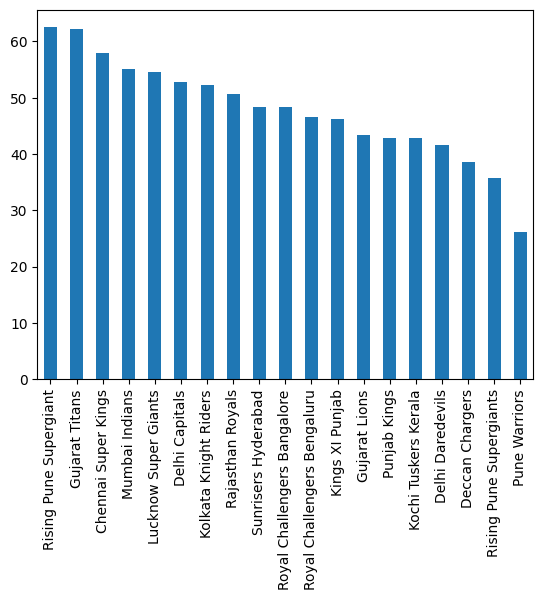

In [13]:
win_perc.plot(kind='bar')

In [14]:
RCB_Wratio=RCB_Wins/RCB_Plays * 100
round(RCB_Wratio,2)

48.24

Toss-winning and its impact on match result

In [15]:
TM_WIN=data[data['toss_winner']==data['winner']].shape[0]
TM_WIN

554

In [16]:
# Percentage of Toss winner winning the Match
round(TM_WIN/data.shape[0] * 100,2)

50.59

Teams match winning probability on winning the toss

In [17]:
#Teams with the Most Toss Wins
toss_wins=data['toss_winner'].value_counts()
toss_wins

toss_winner
Mumbai Indians                 143
Kolkata Knight Riders          122
Chennai Super Kings            122
Rajasthan Royals               120
Royal Challengers Bangalore    113
Sunrisers Hyderabad             88
Kings XI Punjab                 85
Delhi Daredevils                80
Delhi Capitals                  50
Deccan Chargers                 43
Punjab Kings                    24
Gujarat Titans                  22
Pune Warriors                   20
Lucknow Super Giants            19
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Royal Challengers Bengaluru      8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: count, dtype: int64

In [18]:
# Team wins while winning the toss
mask1=data['toss_winner']==data['winner']
toss_matchwin=data[mask1]['winner'].value_counts()
toss_matchwin

winner
Mumbai Indians                 78
Chennai Super Kings            75
Kolkata Knight Riders          68
Rajasthan Royals               60
Royal Challengers Bangalore    57
Sunrisers Hyderabad            38
Kings XI Punjab                36
Delhi Daredevils               35
Delhi Capitals                 26
Deccan Chargers                19
Gujarat Titans                 14
Lucknow Super Giants           10
Gujarat Lions                  10
Punjab Kings                    9
Rising Pune Supergiant          5
Royal Challengers Bengaluru     4
Kochi Tuskers Kerala            4
Pune Warriors                   3
Rising Pune Supergiants         3
Name: count, dtype: int64

In [19]:
#teams match winning probability on winning the toss
round(toss_matchwin/toss_wins * 100,2)

Chennai Super Kings            61.48
Deccan Chargers                44.19
Delhi Capitals                 52.00
Delhi Daredevils               43.75
Gujarat Lions                  66.67
Gujarat Titans                 63.64
Kings XI Punjab                42.35
Kochi Tuskers Kerala           50.00
Kolkata Knight Riders          55.74
Lucknow Super Giants           52.63
Mumbai Indians                 54.55
Pune Warriors                  15.00
Punjab Kings                   37.50
Rajasthan Royals               50.00
Rising Pune Supergiant         83.33
Rising Pune Supergiants        42.86
Royal Challengers Bangalore    50.44
Royal Challengers Bengaluru    50.00
Sunrisers Hyderabad            43.18
Name: count, dtype: float64

In [20]:
# Perc of toss-match wins in total wins
round(toss_matchwin/winning_count * 100,2)

winner
Chennai Super Kings            54.35
Deccan Chargers                65.52
Delhi Capitals                 54.17
Delhi Daredevils               52.24
Gujarat Lions                  76.92
Gujarat Titans                 50.00
Kings XI Punjab                40.91
Kochi Tuskers Kerala           66.67
Kolkata Knight Riders          51.91
Lucknow Super Giants           41.67
Mumbai Indians                 54.17
Pune Warriors                  25.00
Punjab Kings                   37.50
Rajasthan Royals               53.57
Rising Pune Supergiant         50.00
Rising Pune Supergiants        60.00
Royal Challengers Bangalore    49.14
Royal Challengers Bengaluru    57.14
Sunrisers Hyderabad            43.18
Name: count, dtype: float64

Chasing VS Defending

<Axes: ylabel='count'>

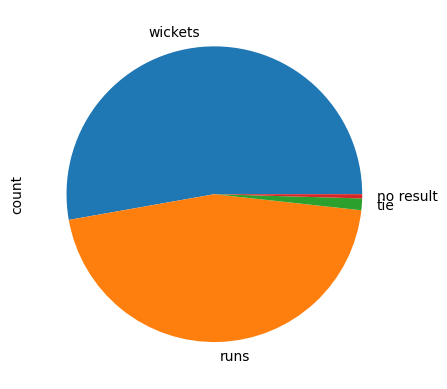

In [21]:
# CHASING VS DEFENDING
# WON BY WICKETS IS CHASING 
data['result'].value_counts().plot(kind='pie')

Most Successfull Run chases

In [22]:
data[data['result']=='wickets']['winner'].value_counts().sort_values(ascending=False).head()

winner
Kolkata Knight Riders          76
Mumbai Indians                 71
Rajasthan Royals               67
Chennai Super Kings            67
Royal Challengers Bangalore    61
Name: count, dtype: int64

In [23]:
# Successfull run chases when target is 200 or more
mask2=data['result']=='wickets'
mask3=data['target_runs']>=200
mask23=mask2 & mask3
#data[(mask23)&(data['winner']=='Mumbai Indians')]
data[mask23]['winner'].value_counts().sort_values(ascending=False).head()

winner
Mumbai Indians          5
Punjab Kings            4
Rajasthan Royals        3
Lucknow Super Giants    3
Kings XI Punjab         3
Name: count, dtype: int64

In [24]:
#Highest successfull runchase
mask4=data[mask2]
mask4[mask4['target_runs']==max(mask4['target_runs'])][['team1','team2','target_runs','winner','player_of_match']]

,team1,team2,target_runs,winner,player_of_match
1065,Kolkata Knight Riders,Punjab Kings,262.0,Punjab Kings,JM Bairstow


IPL Winners

In [25]:
data.drop_duplicates(subset='season',keep='last')[['season','winner']].sort_values('season')

,season,winner
57,2007/08,Rajasthan Royals
114,2009,Deccan Chargers
174,2009/10,Chennai Super Kings
247,2011,Chennai Super Kings
321,2012,Kolkata Knight Riders
397,2013,Mumbai Indians
457,2014,Kolkata Knight Riders
516,2015,Mumbai Indians
576,2016,Sunrisers Hyderabad
635,2017,Mumbai Indians


Most Finals & Most MOMS

In [26]:
#most finals
#data.drop_duplicates(subset='season',keep='last')
finals=data[data['match_type']=='Final']
finals=finals['team1'].value_counts()+finals['team2'].value_counts()
finals.sort_values(ascending=False).head(5)

Chennai Super Kings            10.0
Mumbai Indians                  6.0
Kolkata Knight Riders           4.0
Sunrisers Hyderabad             3.0
Royal Challengers Bangalore     3.0
Name: count, dtype: float64

In [27]:
#Most MOMS
data['player_of_match'].value_counts().sort_values(ascending=False).head(10)

player_of_match
AB de Villiers    25
CH Gayle          22
RG Sharma         19
DA Warner         18
V Kohli           18
MS Dhoni          17
RA Jadeja         16
SR Watson         16
YK Pathan         16
AD Russell        15
Name: count, dtype: int64

In [28]:
#Most MOMS vs Chennai Super Kings

F1 = (data['team2'] == 'Chennai Super Kings') & (data['winner'] != 'Chennai Super Kings')
F2 = (data['team1'] == 'Chennai Super Kings') & (data['winner'] != 'Chennai Super Kings')
F = F1 | F2  # Combine both conditions

# Filter the dataset and find the top 10 most frequent "player_of_match" against CSK
top_moms = data[F]['player_of_match'].value_counts().sort_values(ascending=False).head(10)

top_moms


player_of_match
KA Pollard        4
DA Warner         3
KL Rahul          3
RG Sharma         3
S Dhawan          3
G Gambhir         2
AB de Villiers    2
SR Tendulkar      2
V Sehwag          2
AC Gilchrist      2
Name: count, dtype: int64

# INSERTING DELIVERIES DATA

In [29]:
data2=pd.read_csv('deliveries.csv')

In [30]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260920 entries, 0 to 260919
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          260920 non-null  int64 
 1   inning            260920 non-null  int64 
 2   batting_team      260920 non-null  object
 3   bowling_team      260920 non-null  object
 4   over              260920 non-null  int64 
 5   ball              260920 non-null  int64 
 6   batter            260920 non-null  object
 7   bowler            260920 non-null  object
 8   non_striker       260920 non-null  object
 9   batsman_runs      260920 non-null  int64 
 10  extra_runs        260920 non-null  int64 
 11  total_runs        260920 non-null  int64 
 12  extras_type       14125 non-null   object
 13  is_wicket         260920 non-null  int64 
 14  player_dismissed  12950 non-null   object
 15  dismissal_kind    12950 non-null   object
 16  fielder           9354 non-null    obj

In [31]:
data2

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260915,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,5,SS Iyer,AK Markram,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260916,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,9,6,VR Iyer,AK Markram,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260917,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,1,VR Iyer,Shahbaz Ahmed,SS Iyer,1,0,1,NaN,0,NaN,NaN,NaN
260918,1426312,2,Kolkata Knight Riders,Sunrisers Hyderabad,10,2,SS Iyer,Shahbaz Ahmed,VR Iyer,1,0,1,NaN,0,NaN,NaN,NaN


Most Individual runs in IPL

In [32]:
data2.groupby('batter')[['batter','batsman_runs']].sum('batsman_runs').sort_values(by='batsman_runs',ascending=False).head(10)

,batsman_runs
batter,
V Kohli,8014
S Dhawan,6769
RG Sharma,6630
DA Warner,6567
SK Raina,5536
MS Dhoni,5243
AB de Villiers,5181
CH Gayle,4997
RV Uthappa,4954


Most wickets in IPL

In [33]:
data2.groupby('bowler')[['bowler','is_wicket']].sum('is_wicket').sort_values(by='is_wicket',ascending=False).head(10)

,is_wicket
bowler,
YS Chahal,213
DJ Bravo,207
PP Chawla,201
SP Narine,200
R Ashwin,198
B Kumar,195
SL Malinga,188
A Mishra,183
JJ Bumrah,182


Most Sixes in IPL

In [34]:
data2[data2['batsman_runs']==6].groupby('batter')['batsman_runs'].count().sort_values(ascending=False).head(10)

batter
CH Gayle          359
RG Sharma         281
V Kohli           273
AB de Villiers    253
MS Dhoni          252
DA Warner         236
KA Pollard        224
AD Russell        209
SV Samson         206
SK Raina          204
Name: batsman_runs, dtype: int64

Most Centuries in IPL

In [35]:
Runs_permatch=data2.groupby(['match_id','batter'])['batsman_runs'].sum('batsman_runs').reset_index()
Centuries=Runs_permatch[Runs_permatch['batsman_runs']>=100].groupby('batter').count().reset_index()
Most_Centuries=Centuries[['batter','batsman_runs']].sort_values(by='batsman_runs',ascending=False).head()
Most_Centuries.rename(columns={"batsman_runs":"Centuries"}).set_index('batter')

,Centuries
batter,
V Kohli,8
JC Buttler,7
CH Gayle,6
DA Warner,4
KL Rahul,4


Most Fifers in IPL

In [36]:
wickets_permatch=data2.groupby(['match_id','bowler'])['is_wicket'].sum('is_wicket').reset_index()
fifers=wickets_permatch[wickets_permatch['is_wicket']>=5]
fifers.value_counts('bowler').head()

bowler
JJ Bumrah      3
JP Faulkner    3
SP Narine      3
AJ Tye         2
SL Malinga     2
Name: count, dtype: int64

In [37]:
# checking Bumrah's Fifers 
wickets_permatch=data2.groupby(['match_id','bowler']).sum('is_wicket').reset_index()
matchid=wickets_permatch[(wickets_permatch['bowler']=='JJ Bumrah')&(wickets_permatch['is_wicket']>=5)]['match_id'].reset_index()
data[data['id'].isin(matchid['match_id'])]

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
791,1216517,2020/21,NaN,2020-10-18,League,KL Rahul,Dubai International Cricket Stadium,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,Kings XI Punjab,tie,NaN,177.0,20.0,Y,NaN,Nitin Menon,PR Reiffel
931,1304102,2022,Navi Mumbai,2022-05-09,League,JJ Bumrah,"Dr DY Patil Sports Academy, Mumbai",Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,Kolkata Knight Riders,runs,52.0,166.0,20.0,N,NaN,CB Gaffaney,GR Sadashiv Iyer
1048,1426263,2024,Mumbai,2024-04-11,League,JJ Bumrah,"Wankhede Stadium, Mumbai",Royal Challengers Bengaluru,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,7.0,197.0,20.0,N,NaN,Nitin Menon,VA Kulkarni


Joining two Datasets

In [38]:
#Joining Matches and Deliveries data sets and name it is Data3
data3=data.merge(data2,how='inner',left_on='id',right_on='match_id')
data3.columns

Index(['id', 'season', 'city', 'date', 'match_type', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'method', 'umpire1', 'umpire2', 'match_id', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batter', 'bowler', 'non_striker',
       'batsman_runs', 'extra_runs', 'total_runs', 'extras_type', 'is_wicket',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

Most Individual runs in a season 

In [39]:
data3.groupby(['season','batter'])[['season','batter','batsman_runs']].sum('batsman_runs').sort_values(by='batsman_runs',ascending=False).head(10)

,,batsman_runs
season,batter,
2016,V Kohli,973
2023,Shubman Gill,890
2022,JC Buttler,863
2016,DA Warner,848
2024,V Kohli,741
2018,KS Williamson,735
2012,CH Gayle,733
2013,MEK Hussey,733
2023,F du Plessis,730


In [40]:
data3.groupby(['season','batting_team'])[['season','batting_team','batsman_runs']].sum('batsman_runs').sort_values(by='batsman_runs',ascending=False).head(10)

,,batsman_runs
season,batting_team,
2024,Sunrisers Hyderabad,2906
2023,Gujarat Titans,2906
2016,Royal Challengers Bangalore,2863
2013,Mumbai Indians,2845
2014,Kings XI Punjab,2824
2023,Mumbai Indians,2821
2022,Rajasthan Royals,2807
2024,Royal Challengers Bengaluru,2789
2012,Chennai Super Kings,2717


In [41]:
data3.groupby(['season','batting_team'])